# Student Math Performance Prediction using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

## Data Loading

In [2]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


# Exploratory Data Analysis

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df['pass_math'] = df['math score'].astype(int).apply(lambda x: 1 if x >= 40 else 0)
df['pass_math'].value_counts()

pass_math
1    959
0     41
Name: count, dtype: int64

## Pass vs Fail in Math

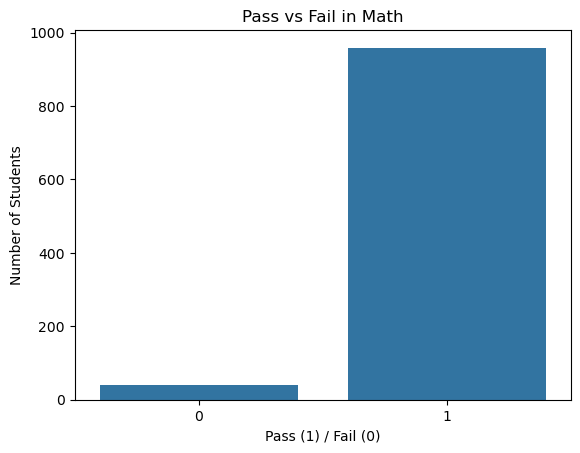

In [5]:
sns.countplot(x='pass_math', data=df)
plt.title("Pass vs Fail in Math")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Number of Students")
plt.show()

## Correlation Heatmap

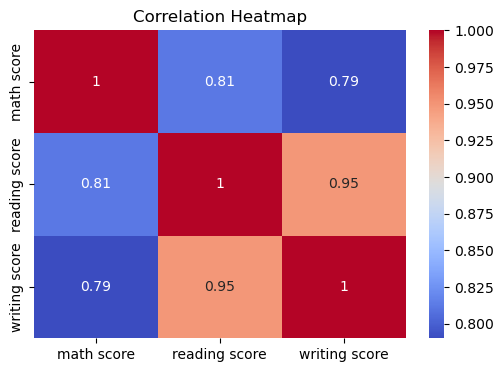

In [6]:
cols = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(6,4))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Encode Categorical Columns

In [7]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math
0,0,3,4,1,0,59,70,78,1
1,1,3,0,1,1,96,93,87,1
2,0,3,4,0,1,57,76,77,1
3,1,1,4,0,1,70,70,63,1
4,0,3,0,1,1,83,85,86,1


## Splitting data into training & testing set (80% train, 20% test)

In [8]:
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course', 'reading score', 'writing score']]
y = df['pass_math']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training 

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Model Evaluation

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.975
Confusion Matrix:
 [[  3   4]
 [  1 192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.98      0.99      0.99       193

    accuracy                           0.97       200
   macro avg       0.86      0.71      0.77       200
weighted avg       0.97      0.97      0.97       200

